<a href="https://colab.research.google.com/github/Santysas19/Analitica_Datos/blob/main/Proyecto_anal%C3%ADtica_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card customers:**
# Predict Churning customers

**Problema general**: Un gerente del banco esta preocupado porque cada vez más clientes dejan sus servicios de tarjetas de crédito. Realmente agradecería si se pudiera predecir quién se va a retirar del servicio para que puedan acudir de manera proactiva al cliente para brindarles mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta.

Esta base de datos consta de 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. Hay 23 características o variables a analizar.


**Objetivo**

Generar un algoritmo capaz de predecir que clientes van retirar el servicio de su trajeta de credito en el banco. 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

In [ ]:
!pip install unidecode

     |████████████████████████████████| 241 kB 5.1 MB/s 


In [ ]:
from unidecode import unidecode

In [ ]:
# Eliminar acentos en el nombre de las columnas
df.columns = [unidecode(str(col)) for col in df.columns]

# Reemplazar espacios por _
df.columns = df.columns.str.replace(' ', '_')
    
# Strip
df.columns = df.columns.str.strip()

# Convierte todas las letras en minúsculas
df.columns = df.columns.str.lower()

# Reemplazar NaN, None
df.replace('-', np.nan, inplace=True)

# Set axis name
df.rename_axis('id', inplace=True)


In [ ]:
df

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
id,,,,,,,,,,,,,,,,,,,,,,,
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [ ]:
df.isna().sum()

clientnum                                                                                                                             0
attrition_flag                                                                                                                        0
customer_age                                                                                                                          0
gender                                                                                                                                0
dependent_count                                                                                                                       0
education_level                                                                                                                       0
marital_status                                                                                                                        0
income_category                                 

In [ ]:
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'],
      dtype='object')

In [ ]:
renaming={
    'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1':'naive_bayes_1',
    'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2':'naive_bayes_2'
}
df.rename(columns=renaming, inplace=True)


In [ ]:
df

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams.keys()
sns.set_palette('Accent')

<Figure size 2880x720 with 0 Axes>

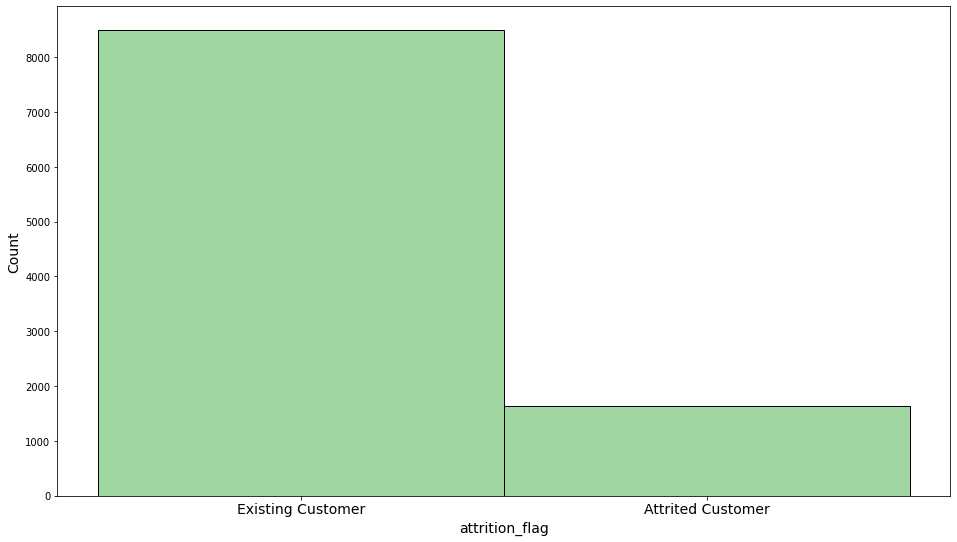

<Figure size 2880x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['attrition_flag'], data= df)
plt.figure(figsize= (40,10))

**Nota:** Esta variable evidencia si el cliente tiene una cuenta existente o no con el banco

Se evidencia que la tendencia (moda) de esta variable es que el cliente tenga una cuenta existente con el banco

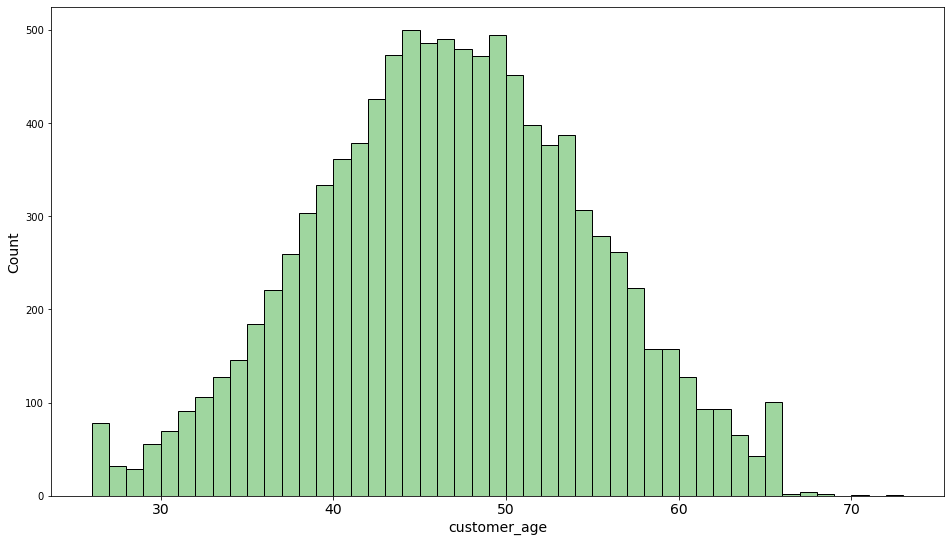

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['customer_age'], data= df)

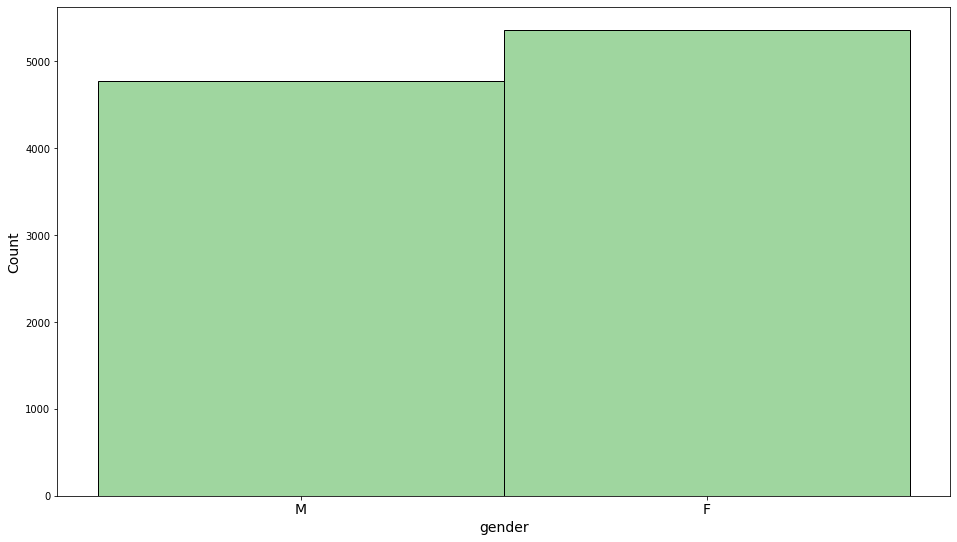

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['gender'], data= df)

**Nota:** Esta variable evidencia si el género del cliente 

Se evidencia que la tendencia (moda) de esta variable es que el cliente sea de género femenino

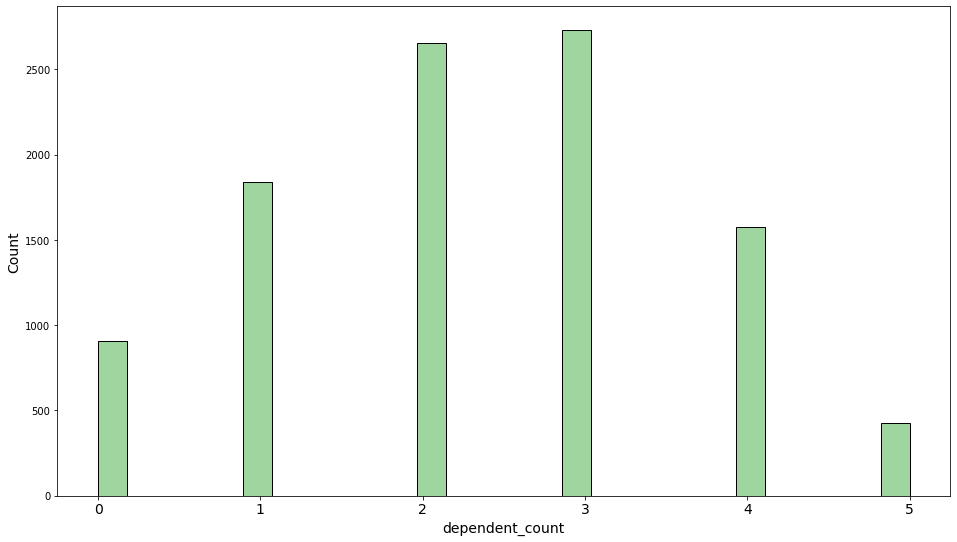

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['dependent_count'], data = df)

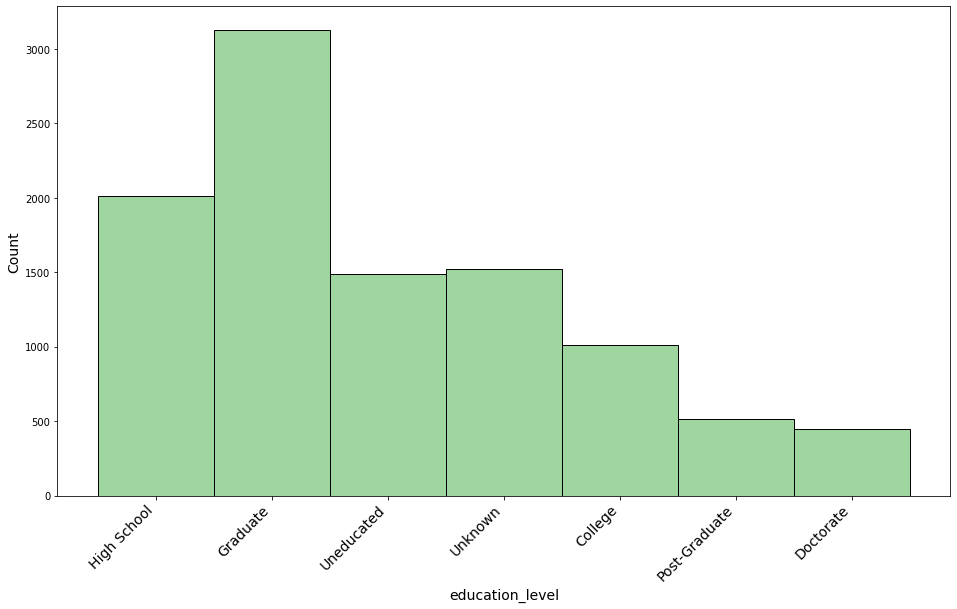

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['education_level'], data = df)
plt.xticks(rotation=45,ha='right');

**Nota:** Esta variable evidencia el nivel de educación del cliente

Se evidencia que la tendencia (moda) de esta variable es que el cliente tenga como máximo nivel de educación ('graduate'), es decir, que ha cursado una carrera profesional

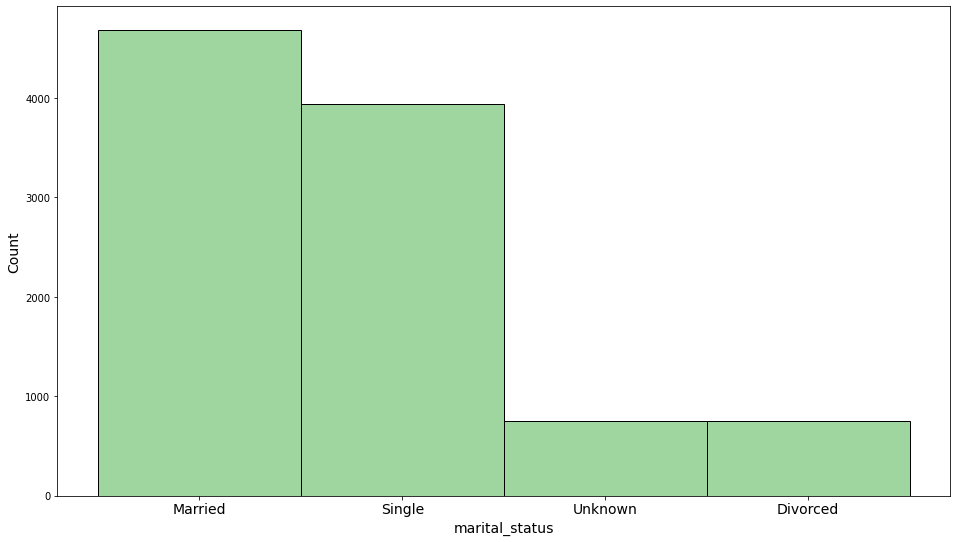

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['marital_status'], data= df)

**Nota:** Esta variable evidencia si el estado civil del cliente

Se evidencia que la tendencia (moda) de esta variable es que el cliente esté casado/casada

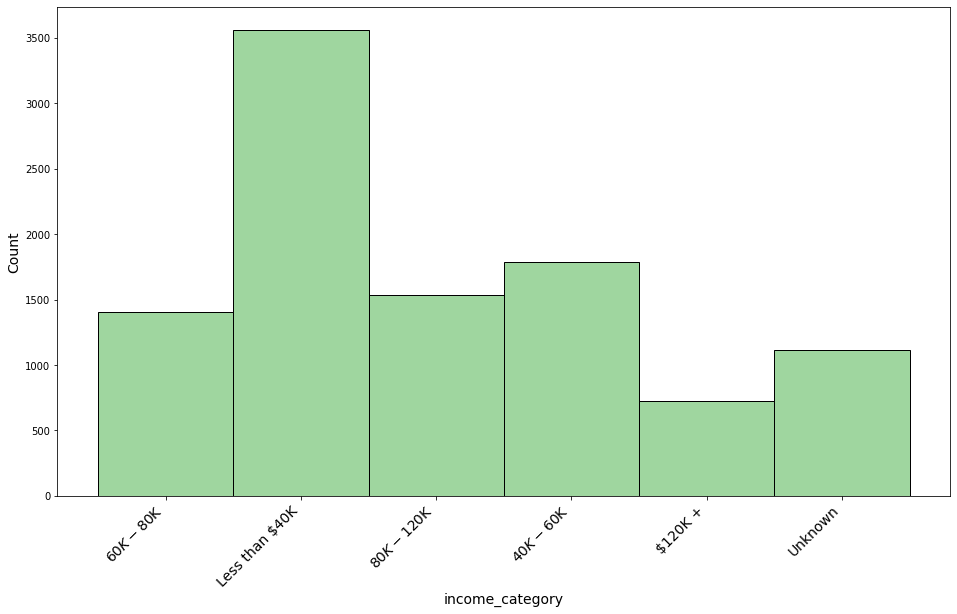

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['income_category'], data= df)
plt.xticks(rotation=45,ha='right');

**Nota:** Esta variable expresa el valor del ingreso anual del cliente (dueño de la cuenta)

Se evidencia que la tendencia (moda) de esta variable es que el dueño de la cuenta tenga unos ingresos menores a los $40000USD

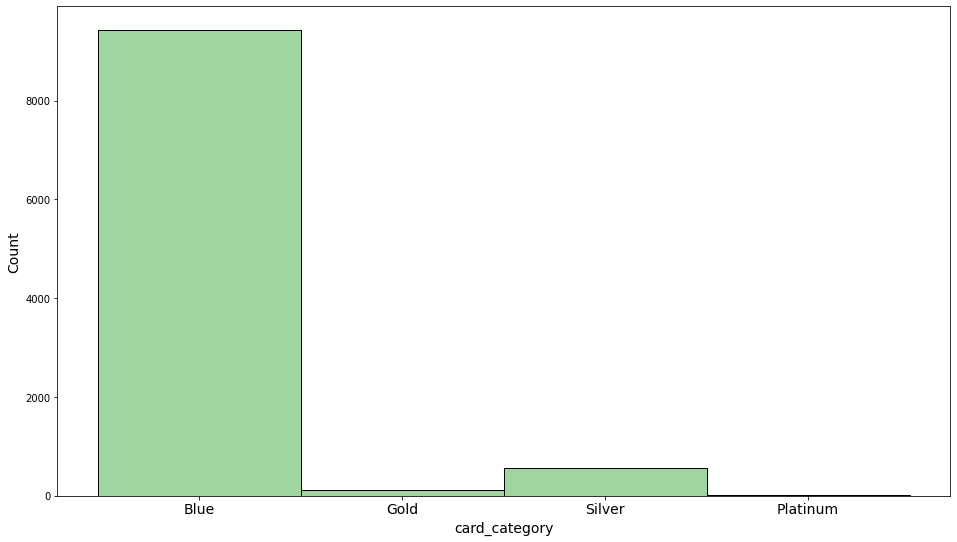

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['card_category'], data=df)

**Nota:** Esta variable expresa el tipo de tarjeta del cliente /dueño de la cuenta

Se evidencia que la tendencia (moda) de esta variable es la tarjeta de tipo 'azul'

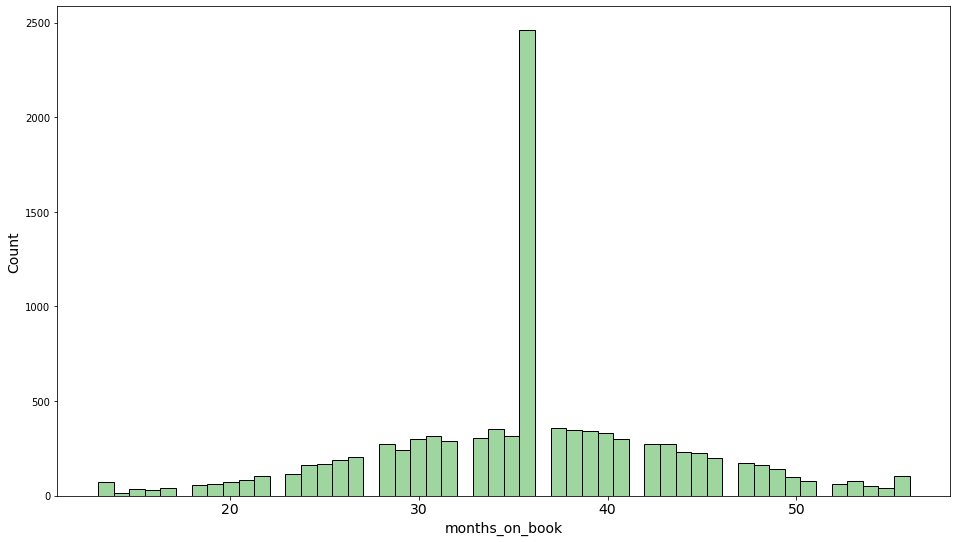

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['months_on_book'], data=df)

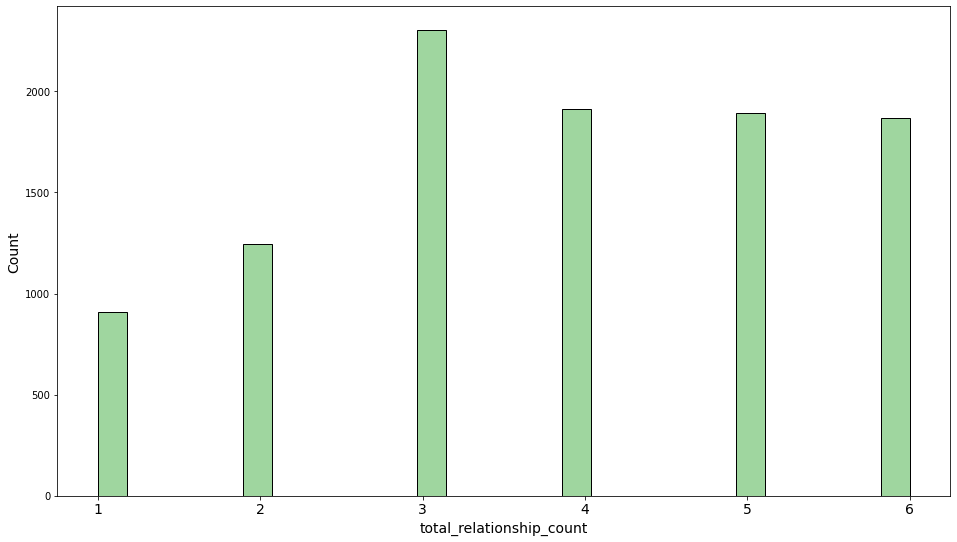

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_relationship_count'], data=df)

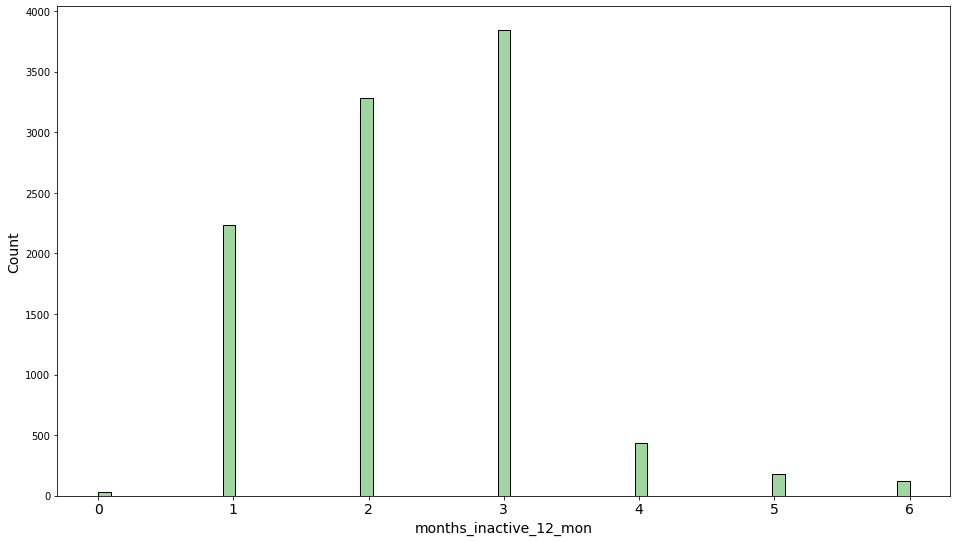

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['months_inactive_12_mon'], data=df)

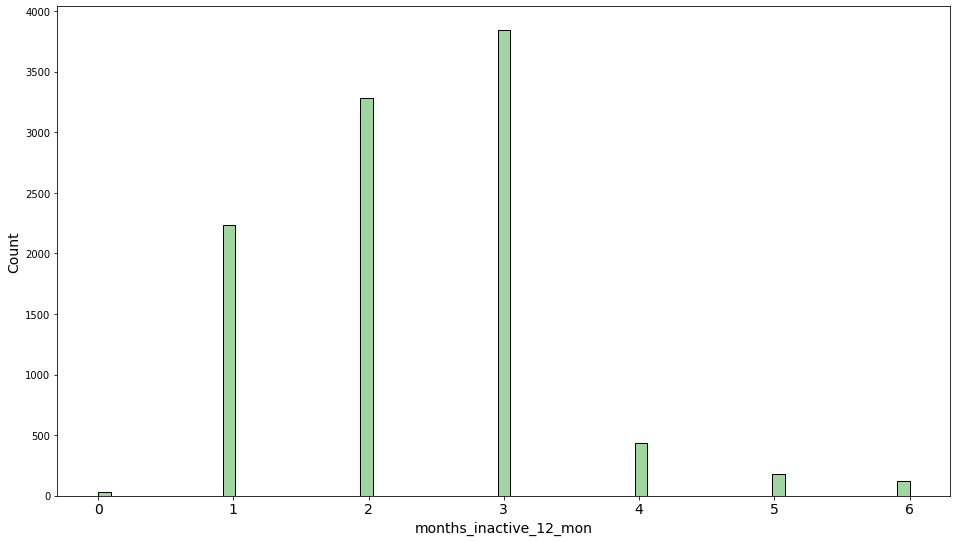

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['months_inactive_12_mon'], data=df)

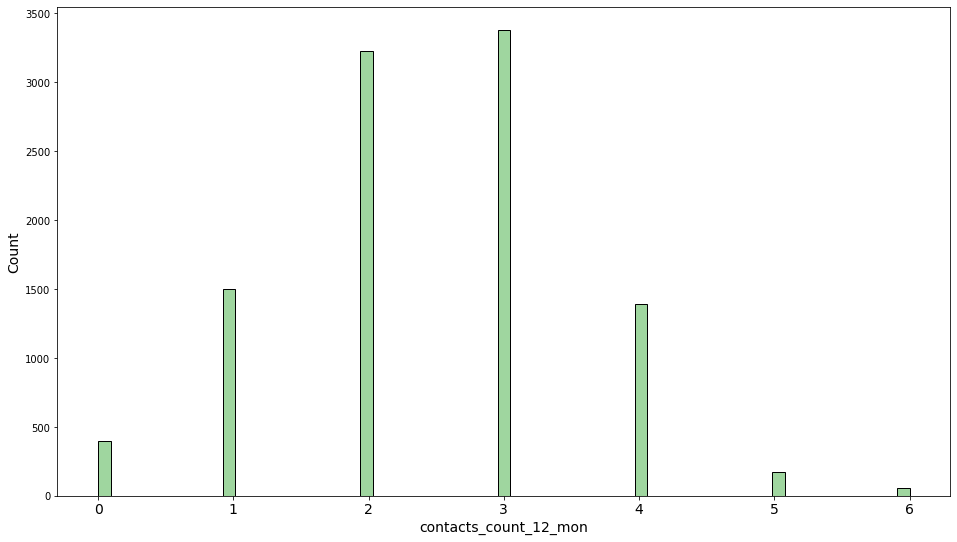

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['contacts_count_12_mon'], data=df)

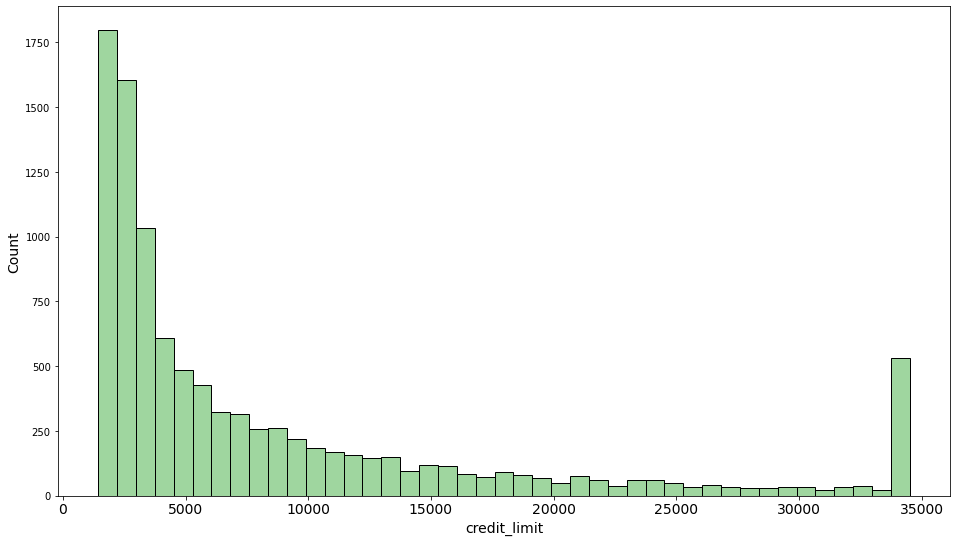

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['credit_limit'], data=df)

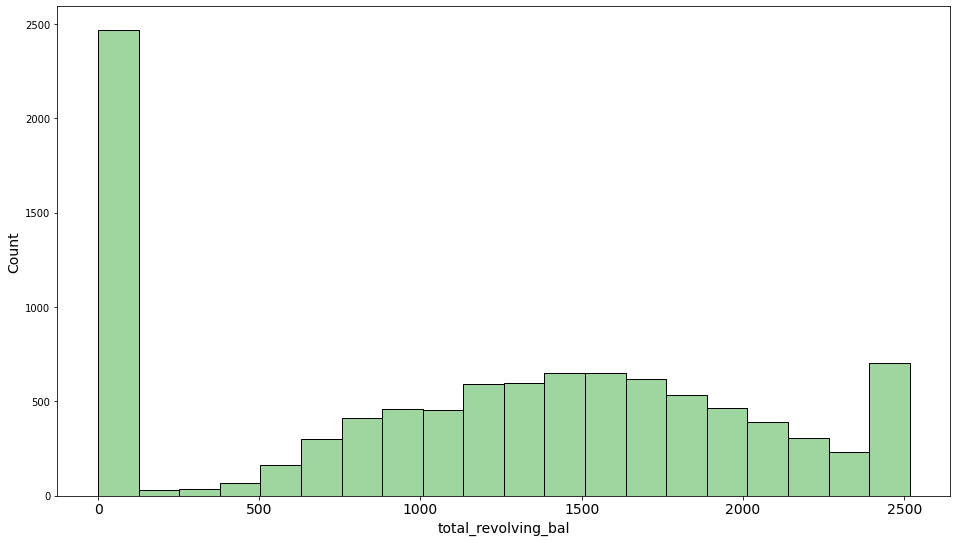

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_revolving_bal'], data=df)

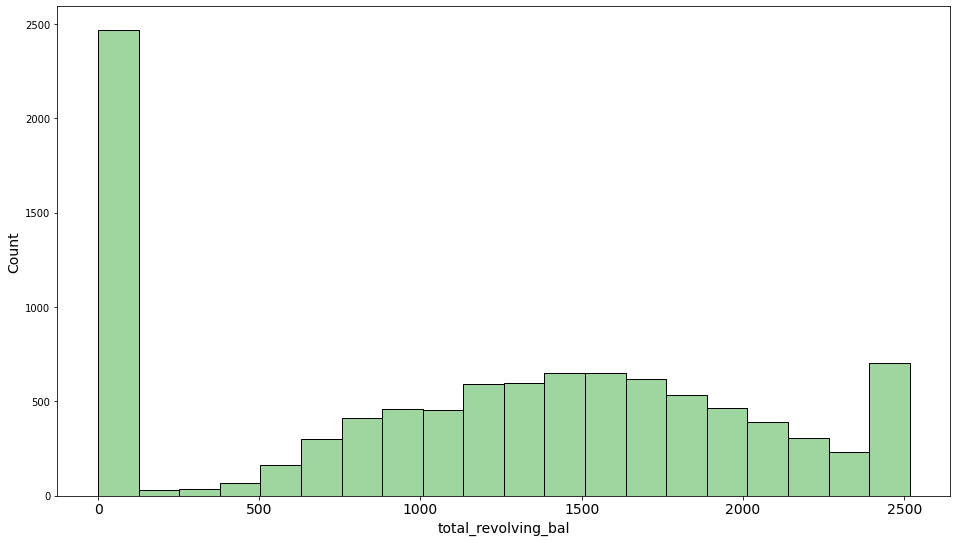

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_revolving_bal'], data=df)

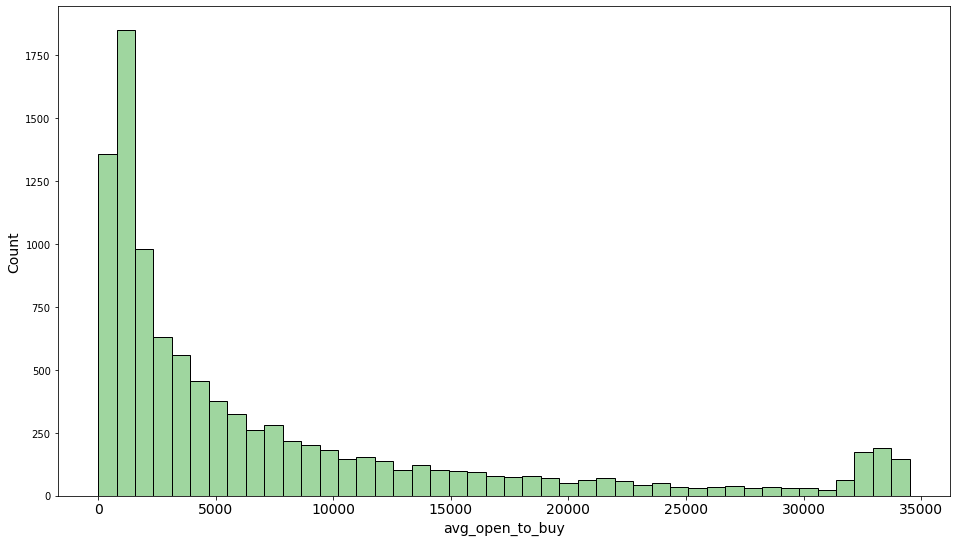

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['avg_open_to_buy'], data=df)

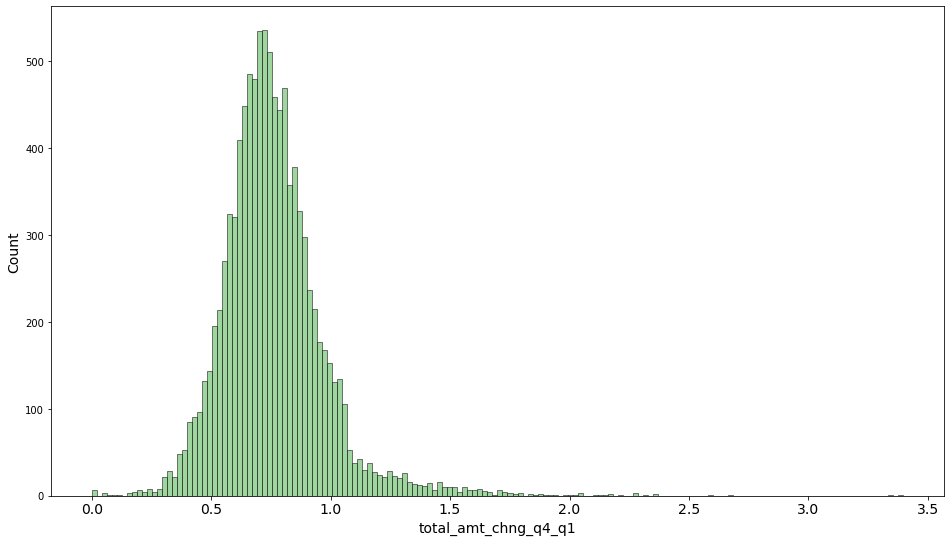

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_amt_chng_q4_q1'], data=df)

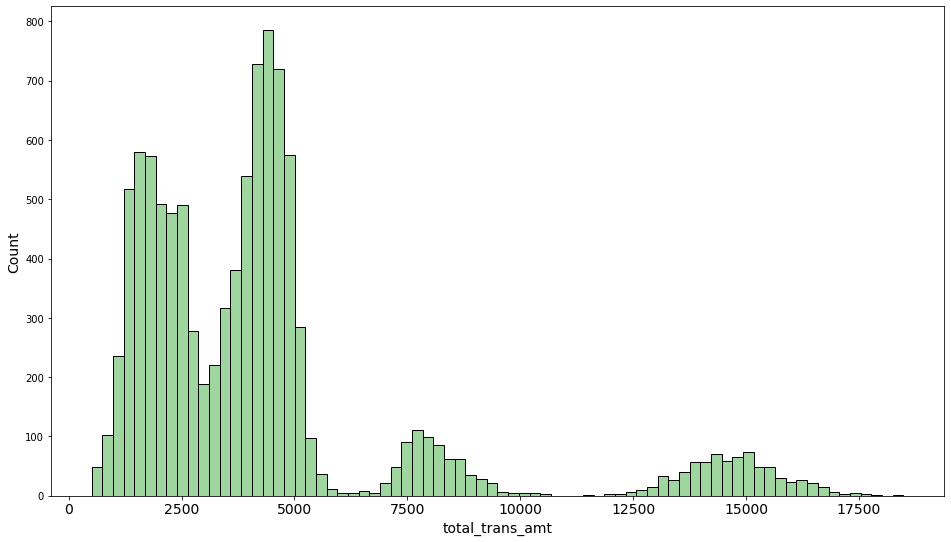

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_trans_amt'], data=df)

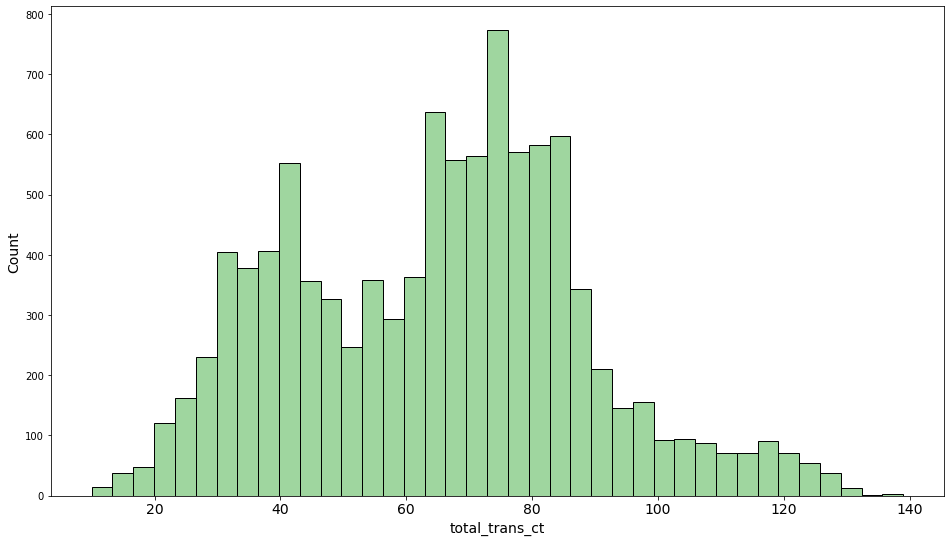

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_trans_ct'], data=df)

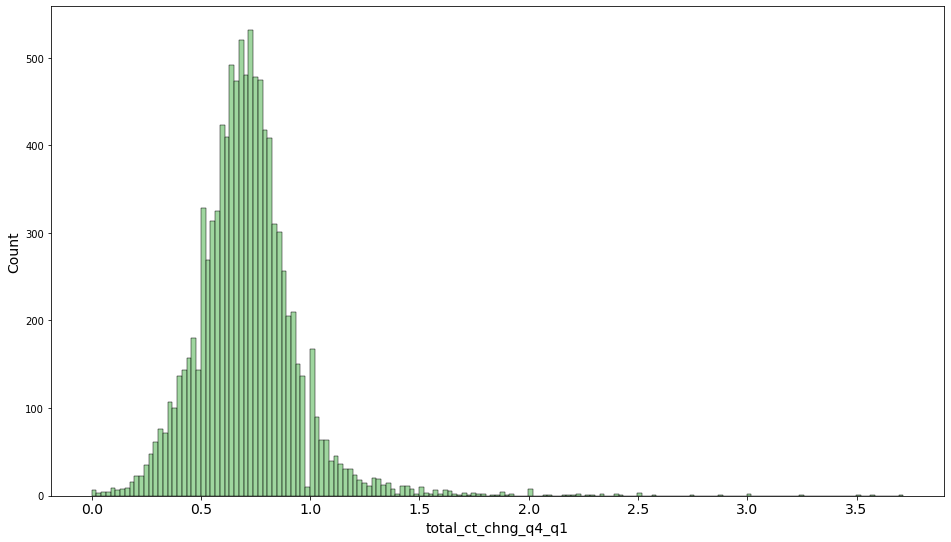

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['total_ct_chng_q4_q1'], data=df)

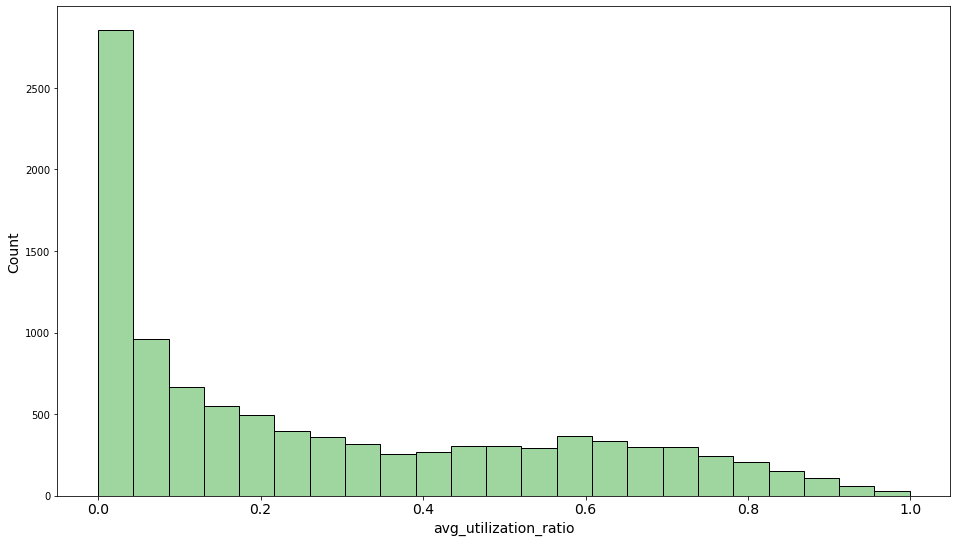

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x= df['avg_utilization_ratio'], data=df)

In [ ]:
df.describe() #Antes de la eliminación de los datos atípicos

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


**Eliminación de datos atípicos**

**Customer_age**

In [ ]:
meanage = df['customer_age'].mean() 
stdage = df['customer_age'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf = df 
copydf = copydf.drop(copydf[copydf['customer_age']> toprange].index) 
copydf = copydf.drop(copydf[copydf['customer_age']< botrange].index)
copydf.shape 

(9643, 23)

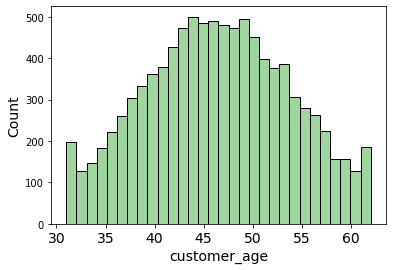

In [ ]:
sns.histplot(x = copydf['customer_age'], data= copydf)

**Nota:** Los datos atípicos para esta variable muestran aquellas edades con menor presencia en los clientes del banco. Se identifica que las edades por fuera de los 31 años y los 63 años aproxidamente son datos atípicos.

Se decide eliminar estos 484 datos por fuera de este rango dado que no pueden reemplazarse por otros o la media de los datos dada su característica única. Además, se evidencia que las edades mayores a 70 años son eliminadas por completo.

Estadísticos de **customer_age** al quitar datos atípicos:

In [ ]:
copydf['customer_age'].describe()

count    9643.000000
mean       46.419579
std         7.128058
min        31.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        62.000000
Name: customer_age, dtype: float64

**Dependent_count**

In [ ]:
meanDc = df['dependent_count'].mean() 
stdDc = df['dependent_count'].std() 
toprange = meanDc + 1.96*stdDc
botrange = meanDc - 1.96*stdDc
copydfDc = df 
copydfDc = copydfDc.drop(copydfDc[copydfDc['dependent_count']> toprange].index) 
copydfDc = copydfDc.drop(copydfDc[copydfDc['dependent_count']< botrange].index)
copydfDc.shape 

(9703, 23)

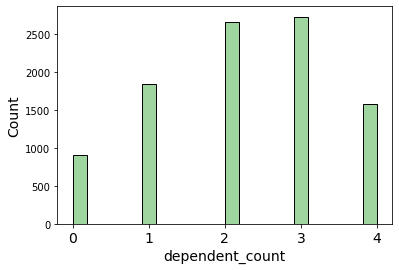

In [ ]:
sns.histplot(x = copydfDc['dependent_count'], data= copydfDc)

**Nota:** Los datos atípicos para esta variable evidencian el número de dependientes menos frecuente en los clientes.

Si se decide eliminar los datos atipicos (424), se evidencia que la dependencia de número'5' se elimina completamente. Esto debido a que no son datos que puedan reemplazarse por una media u otro dato dadas sus características.

Estadísticos de **dependent_count** al quitar datos atípicos:

In [ ]:
copydf['dependent_count'].describe()

count    9643.000000
mean        2.439697
std         1.252737
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: dependent_count, dtype: float64

**months_on_book**

In [ ]:
meanMb = df['months_on_book'].mean() 
stdMb = df['months_on_book'].std() 
toprange = meanMb + 1.96*stdMb
botrange = meanMb - 1.96*stdMb
copydfMb = df 
copydfMb = copydfMb.drop(copydfMb[copydfMb['months_on_book']> toprange].index) 
copydfMb = copydfMb.drop(copydfMb[copydfMb['months_on_book']< botrange].index)
copydfMb.shape 

(9406, 23)

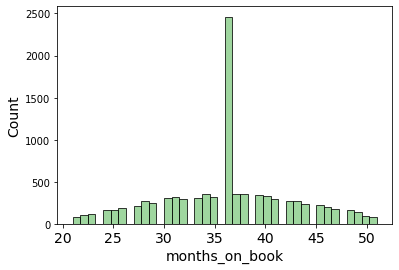

In [ ]:
sns.histplot(x = copydfMb['months_on_book'], data= copydfMb)

**Nota:** Los datos atípicos para esta variable evidencian los extremos de duración (corta o larga) de la relación con el banco de los clientes

Se eliminan los datos que tienen una duración menor a 22 meses y mayor a 51 meses de relación con el banco, debido a la tendencia del gráfico y a la imposibilidad de cambiar estos datos por otro valor.

Estadísticos de **months_on_book** al quitar datos atípicos:

In [ ]:
copydf['months_on_book'].describe()

count    9643.00000
mean       35.98683
std         7.32514
min        13.00000
25%        32.00000
50%        36.00000
75%        40.00000
max        56.00000
Name: months_on_book, dtype: float64

# **total_relationship_count**

In [ ]:
meanage = df['total_relationship_count'].mean() 
stdage = df['total_relationship_count'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf = df 
copydf1 = copydf[copydf['total_relationship_count']> toprange]
copydf1 = copydf[copydf['total_relationship_count']< botrange]
copydf1

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


#**Conclusión:** 
Para esta variable, no se encontraron datos atípicos, teniendo en cuenta que los clientes no se van a retirar por tener uno o más productos a su cargo de su tarjeta.

# **months_inactive_12_mon**

In [ ]:
meanage = df['months_inactive_12_mon'].mean() 
stdage = df['months_inactive_12_mon'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf12 = df 
copydf2 = copydf12[copydf12['months_inactive_12_mon']> toprange]
copydf2 = copydf12[copydf12['months_inactive_12_mon']< botrange]
copydf2.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,
29,806624208,Existing Customer,47,M,4,High School,Married,$40K - $60K,Blue,42,6,0,0,4785.0,1362,3423.0,0.739,1045,38,0.900,0.285,0.000008,0.99999
108,808284783,Existing Customer,62,F,1,Unknown,Married,Less than $40K,Blue,56,6,0,0,1438.3,0,1438.3,0.813,1951,44,1.095,0.000,0.000008,0.99999
1470,721084833,Existing Customer,48,M,5,High School,Married,$40K - $60K,Silver,34,5,0,2,17657.0,2018,15639.0,0.550,1682,39,0.950,0.114,0.000018,0.99998
1721,711509658,Attrited Customer,61,M,2,Graduate,Married,$120K +,Blue,49,3,0,4,11374.0,2517,8857.0,1.015,1088,26,1.167,0.221,0.983190,0.01681
2126,715517733,Attrited Customer,46,F,3,High School,Single,Less than $40K,Silver,39,1,0,4,13092.0,1962,11130.0,0.686,936,25,0.250,0.150,0.981590,0.01841


**Nota:** Los datos atípicos para esta variable muestran la gente que esta utilizando la tarjeta constantemente durante el último año, por lo tanto llevan 0 meses inactivos.

Al ver que son únicamente 29 clientes que están activos, se analizó que no es una cantidad significativa de clientes para poder tomar desiciones con valor. Por esto, se decidió eliminar estos datos, debido a que no es adecuado reemplazarlos por la media de inactividad u otros datos.


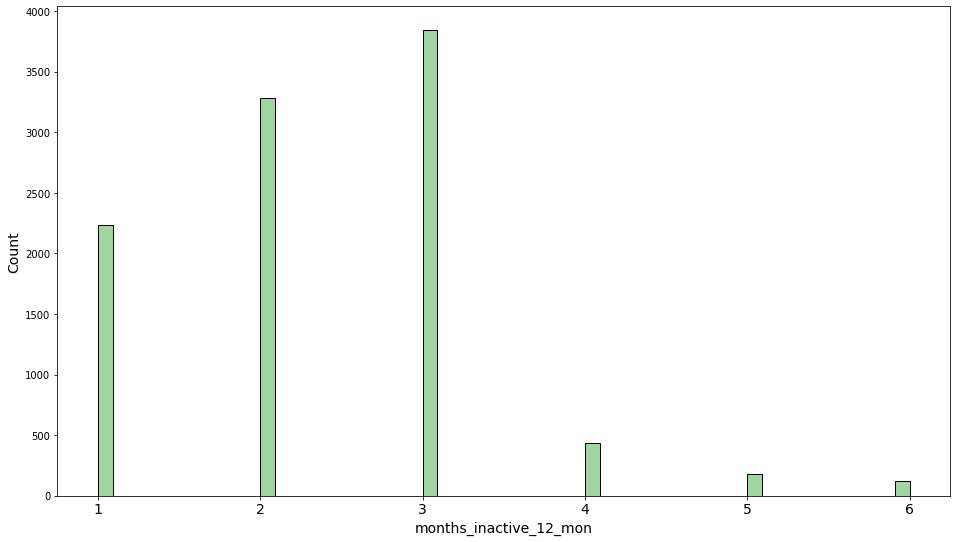

In [ ]:
meanage = df['months_inactive_12_mon'].mean() 
stdage = df['months_inactive_12_mon'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copyIn = df 
copyInac = copyIn.drop(copyIn[copyIn['months_inactive_12_mon']> toprange].index)
copyInac= copyIn.drop(copyIn[copyIn['months_inactive_12_mon']< botrange].index)
plt.figure(figsize=(16,9))
sns.histplot(x= copyInac['months_inactive_12_mon'], data=copyInac)

# **Conclusión:** 
Después de remover los datos atipicos se pudo ver de manera más clara, que las personas más propensas a dejar las tarjetas de crédito con ese banco son aquellas que llevan un mes o más inactivos en plazo del último año.

# **contacts_counts_12_mon**

In [ ]:
meanage = df['contacts_count_12_mon'].mean() 
stdage = df['contacts_count_12_mon'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf12 = df 
copydf2 = copydf12[copydf12['contacts_count_12_mon']> toprange]
copydf2 = copydf12[copydf12['contacts_count_12_mon']< botrange]
copydf2.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000,0.000048,0.99995
20,806165208,Existing Customer,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,5,2,0,20979.0,1800,19179.0,0.906,1178,27,0.929,0.086,0.000057,0.99994


# **Conclusión:** 
Para los datos atípicos de la cantidad de veces que los clientes se han contactado con el banco, se puede ver que las personas que no llamaron al banco son menos propensas a retirar su tarjeta, así mismo como los que tienen mucho contacto con el banco.

# **credit_limit**

In [ ]:
meanage = df['credit_limit'].mean() 
stdage = df['credit_limit'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf12 = df 
copyCredit = copydf12[copydf12['credit_limit']> toprange]
copyCredit = copydf12[copydf12['credit_limit']< botrange]
copyCredit.head()


,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


# **Conclusión:** 
Para el caso del cupo límite de crédito se puede observar que primero no hay datos atípicos, es decir, todos los datos están dentro del rango normal de cupo de crédito. Adicional a esto, se identificó que entre menor es el cupo de la tarjeta los clientes son más propensos a retirarse del banco; exceptuando el caso de cuando tienen el cupo máximo de crédito que se evidencia que aumenta la posibilidad de que retiren este producto del banco.

# **total_revolving_bal**

In [ ]:
meanage = df['total_revolving_bal'].mean() 
stdage = df['total_revolving_bal'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf = df 
copyBal = copydf[copydf12['total_revolving_bal']> toprange]
copyBal = copydf[copydf12['total_revolving_bal']< botrange]
copyBal

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
q1 = df['total_revolving_bal'].quantile(.25)
q3 = df['total_revolving_bal'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copydf_q = df
copydf_q =copydf_q[copydf_q['total_revolving_bal']>toprange_q]
copydf_q = copydf_q[copydf_q['total_revolving_bal']<botrange_q]
copydf_q

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


# **Conclusión:**
Para la variable saldo pendiente se encontró que no hay datos atípicos siendo todos los datos de los clientes significativos en este caso. 
Se analizó de dos maneras diferentes, siendo la primera hallando el 95% de confiabilidad y la segunda por el método de rangos intercuartilícos, y en ninguna se obtuvó residuales.

Se evidencia según la gráfica realizada que los clientes que no tienen saldos pednientes son aquellos que se retiran más fácilmente del banco, después de esto se comporta normalmente la cantidad de clientes que dieron de baja la tarjeta respecto al saldo pendiente, exceptuando cuando la deuda se acumula más allá de los 2300 que se vuelve a incrementar la cantidad de clientes desertando del producto.

# **`avg_open_to_buy`**

In [ ]:
meanage = df['avg_open_to_buy'].mean() 
stdage = df['avg_open_to_buy'].std() 
toprange = meanage + 1.96*stdage
botrange = meanage - 1.96*stdage
copydf1 = df 
copyOpen = copydf1[copydf1['avg_open_to_buy']> toprange]
copyOpen = copydf1[copydf1['avg_open_to_buy']< botrange]
copyOpen.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
q1 = df['avg_open_to_buy'].quantile(.25)
q3 = df['avg_open_to_buy'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copydf_q = df
copydf_q1 =copydf_q[copydf_q['avg_open_to_buy']>toprange_q]
copydf_q1 = copydf_q[copydf_q['avg_open_to_buy']<botrange_q]
copydf_q1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_1,naive_bayes_2
id,,,,,,,,,,,,,,,,,,,,,,,


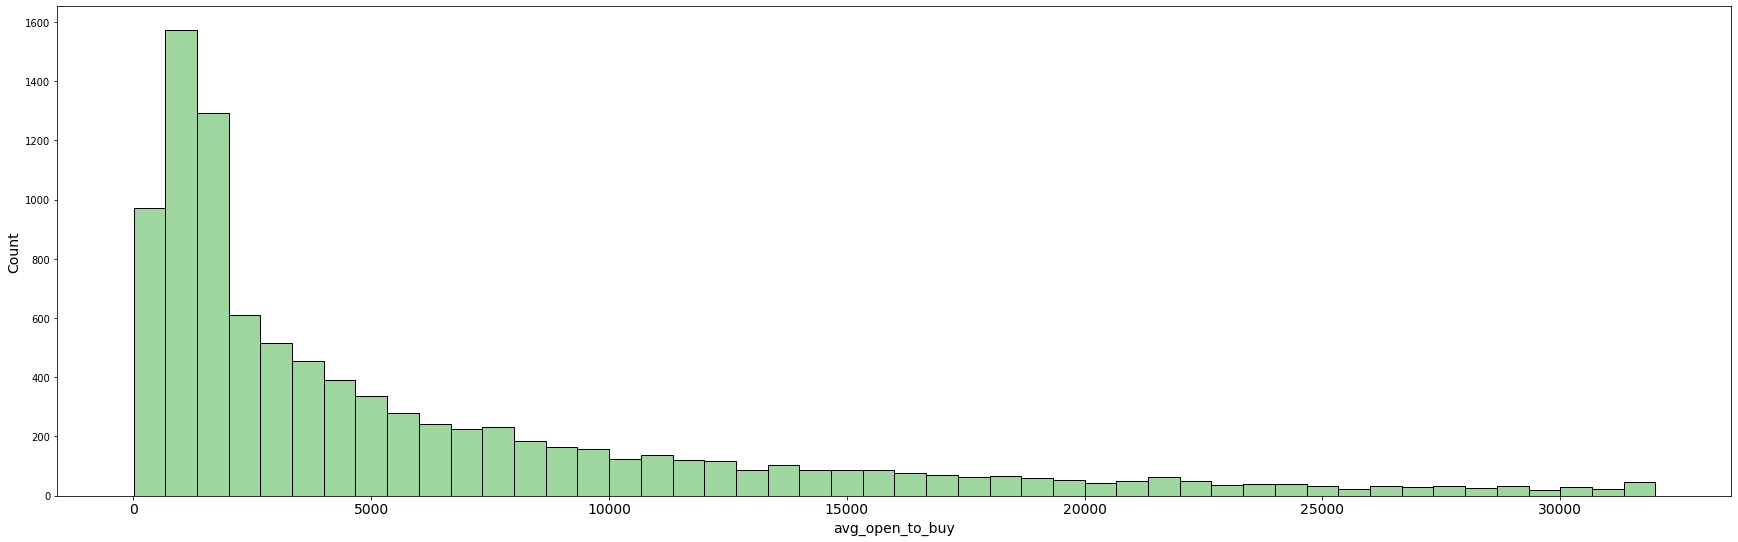

In [ ]:
copyOpen2 = copydf1.drop(copydf1[copydf1['avg_open_to_buy']>32000].index)
plt.figure(figsize=(30,9))
sns.histplot(x= copyOpen2['avg_open_to_buy'], data=copyOpen2)

# **Conclusión:** 
La variable cupo disponible inicialmente se analizó de dos maneras diferentes, siendo la primera hallando el 95% de confiabilidad y la segunda por el método de rangos intercuartilícos, y en ninguna se obtuvó residuales. Después fueron analizados gráficamnete y se tomó la desición que se queríana nalizar más a fondo aquellos clientes que se retiraban entre menor era el cupo, es decir, se eliminaron los datos de aquellos clientes que tenían cupo disponible mayor a 32000 dólares.


**total_ct_chng_q4_q1**

In [ ]:
meantct = df['total_ct_chng_q4_q1'].mean() 
stdtct = df['total_ct_chng_q4_q1'].std() 
toprange = meantct + 1.96*stdtct
botrange = meantct - 1.96*stdtct
copydftct = df 
copydftct = copydftct.drop(copydftct[copydftct['total_ct_chng_q4_q1']> toprange].index) 
copydtct = copydftct.drop(copydftct[copydftct['total_ct_chng_q4_q1']< botrange].index)
copydftct.shape 

(9839, 23)

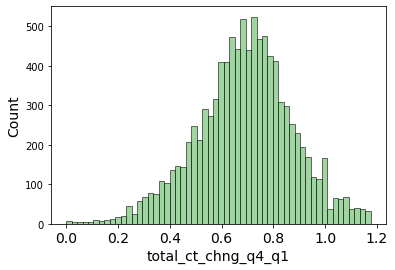

In [ ]:
sns.histplot(x = copydftct['total_ct_chng_q4_q1'], data= copydfMb)

**Nota:** Los datos atípicos evidencian aquellos datos extremos en el cambio en el recuento de transacciones entre el trimestre (Q4) y el trimestre (Q1).

Se eliminan 288 datos, principalmente los mayores a 1.2 debido a la pequeña cantidad de clientes que presentaban este cambio

Estadísticos de **total_ct_chng_q4_q1** al quitar datos atípicos:

In [ ]:
copydf['total_ct_chng_q4_q1'].describe()

count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: total_ct_chng_q4_q1, dtype: float64

**avg_utilization_ratio**

In [ ]:
q1 = df['avg_utilization_ratio'].quantile(.25)
q3 = df['avg_utilization_ratio'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copyavg_q = df
copyavg_q = copyavg_q.drop(copyavg_q[copyavg_q['avg_utilization_ratio']>toprange_q].index)
copyavg_q = copyavg_q.drop(copyavg_q[copyavg_q['avg_utilization_ratio']<botrange_q].index)
copyavg_q.shape

(10127, 23)

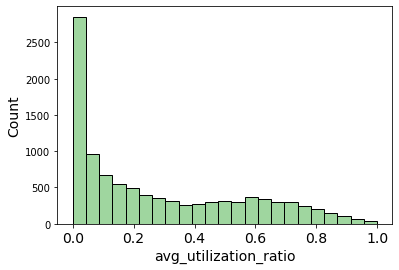

In [ ]:
sns.histplot(x = copyavg_q['avg_utilization_ratio'], data= copyavg_q)

**Nota:** Los datos atípicos evidencian aquellos valores del índice de utilización promedio de la tarjeta presentes en un mínimo número de clientes.

Se evidencia que no se presentan datos atípicos en esta variable a pesar de la variabilidad en el número de clientes en cada índice, lo cual puede atribuirse al método utilizado (rango intercuartilico dado que el comportamiento de esta variable no es de una distribución normal)